In [1]:
import numpy as np
import qiskit.quantum_info as qi
from qiskit import IBMQ
from qiskit.quantum_info.operators import Operator
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.providers.aer import QasmSimulator, PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city

In [2]:
IBMQ.save_account('e6e296eb7eff807ce8dd197fe1a59dde9e017c44fbc49fd2cb7707ea1936510f1b2eb5fe405d4fa9dacb818c2cae8ba99a6f4a6c3ea1340db9efc794b2356c50')
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [3]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [4]:
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                  and not x.configuration().simulator)
backend = least_busy(small_devices)
print(backend)

ibmq_quito


In [ ]:
#a.backends(filters=lambda x: x.configuration().n_qubits >= 5
#                                    and not x.configuration().simulator
#                                    and x.status().operational==True)

In [ ]:
#circuit.snapshot_statevector()

In [ ]:
from qiskit.aqua.operators import StateFn
from qiskit.aqua.operators import Z,X,Y


In [ ]:
#type(Parameter('h1'))

In [54]:
#Monta circuito de acordo com hamiltoniana.
def compose_circ(j1=None, j2=None, b1=None, b2=None, j12=None, t=None):
    #Trotter-suzuki parameters:
    # n-Numero de divisões
    n = 1
    # delt_t- divisão do tempo por 
    delt_j1 = (j1*t)/n
    delt_j2 = (j2*t)/n
    delt_b1 = (b1*t)/n
    delt_b2 = (b2*t)/n
    delt_j12 = (j12*t)/(2*n)
    
    #pi
    pi =3.1415
    
    #Inicializa circuito.
    circ_h = QuantumCircuit(2,2)
    
    #Inicializa os dois qubits no estado inicial.
    circ_h.h(0)
    circ_h.h(1)
    
    #Parametros para os gates
    params_ = {'h1': delt_j1, 'h2': delt_j2, 'h3': delt_j12, 'h4': delt_b1, 'h5': delt_b2}
    params = {'h1': Parameter('h1'), 'h2': Parameter('h2'), 'h3': Parameter('h3'), 'h4': Parameter('h4'), 'h5': Parameter('h5')}

    
    #Parte h1
    def h1_circ(parametro = params['h1']):
        circ_h1 = QuantumCircuit(2,2)
        circ_h1.barrier([0,1])
        #circ_h1.h(1)
        circ_h1.cnot(1,0)
        circ_h1.rz(parametro,1)
        circ_h1.cnot(1,0)
        #circ_h1.h(1)
        #circ_h1.i(1)
        circ_h1.barrier([0,1])
        return circ_h1
    #Parte h1
    def h1_circ_2(parametro = params['h1']):
        circ_h1 = QuantumCircuit(2,2)
        circ_h1.barrier([0,1])
        #circ_h1.h(1)
        circ_h1.rz(parametro,1)
        #circ_h1.h(1)
        #circ_h1.i(1)
        circ_h1.barrier([0,1])
        return circ_h1
    
    
    #Parte h2
    def h2_circ(parametro = params['h2']):
        circ_h2 = QuantumCircuit(2,2)
        circ_h2.barrier([0,1])
        circ_h2.cnot(0,1)
        circ_h2.rz(parametro,0)
        circ_h2.cnot(0,1)
        circ_h2.barrier([0,1])
        return circ_h2
    
    #Parte h2
    def h2_circ_2(parametro = params['h2']):
        circ_h2 = QuantumCircuit(2,2)
        circ_h2.barrier([0,1])
        circ_h2.rz(parametro,0)
        circ_h2.barrier([0,1])
        return circ_h2
    
    #Parte h3-1
    def h3_circ1_2(parametro = params['h3']):        
        circ_h3 = QuantumCircuit(2,2)
        circ_h3.barrier([0,1])
        circ_h3.rzz(parametro, 1, 0)
        circ_h3.barrier([0,1])
        return circ_h3
    
    #Parte h3-2
    def h3_circ2(parametro = params['h3']):
        return h1_circ_2(-parametro)
    #Parte h3-3
    def h3_circ3(parametro = params['h3']):        
        return h2_circ_2(-parametro)
    
    
    #Parte h4
    def h4_circ(parametros=params['h4']):
        circ_h4 = QuantumCircuit(2,2)
        circ_h4.barrier([0,1])
        circ_h4.h(1)
        circ_h4.compose(h1_circ(parametros),inplace=True)#rz? estimar theta com j12?
        circ_h4.h(1)
        circ_h4.barrier([0,1])
        return circ_h4
    
    #parte h5
    def h5_circ(parametros=params['h5']):
        circ_h5 = QuantumCircuit(2,2)
        circ_h5.barrier([0,1])
        circ_h5.h(0)
        circ_h5.compose(h2_circ(parametros),inplace=True)#rz? estimar theta com j12?
        circ_h5.h(0)
        circ_h5.barrier([0,1])
        return circ_h5
    
    #Constroi circuito para Hamiltoniana completa
    def ht_circ():
        circ_t = QuantumCircuit(2,2)
        circ_t.compose(h1_circ_2(), inplace=True)
        circ_t.compose(h2_circ_2(), inplace=True)
        circ_t.compose(h3_circ1_2(), inplace=True)
        circ_t.compose(h3_circ2(), inplace=True)
        circ_t.compose(h3_circ3(), inplace=True)
        #circ_t.compose(h4_circ(), inplace=True)
        #circ_t.compose(h5_circ(), inplace=True)
        return circ_t

        
    #Trotter-suzuki 1 ordem.
    def trotSuzi_1(circ):
        #Cria circuito da trotter suzuki de primeira ordem.
        ts = QuantumCircuit(2,2)
        #_ = list(map(ts.compose(circ, inplace=True),range(n)))
        for a in range(n):
            ts.compose(circ, inplace=True)
        circ_h.compose(ts, inplace=True)
        return
    
    #Trotter-suzuki 2 ordem.
    def trotSuzi_2(circ):
        #Cria circuito da trotter suzuki de primeira ordem.
        ts = QuantumCircuit(2,2)
        ts.compose(circ, inplace=True)
        ts_rev = ts.reverse_ops()
        ts.compose(ts_rev, inplace=True)
        for a in range(n):
            ts.compose(circ, inplace=True)
        circ_h.compose(ts, inplace=True)
        return 
    
    #Trotter-suzuki 1 ordem para teste.
    def trotSuzi_1t(circ):
        #Cria circuito da trotter suzuki de primeira ordem.
        ts = QuantumCircuit(2,2)
        #_ = list(map(ts.compose(circ, inplace=True),range(n)))
        for a in range(n):
            ts.compose(circ, inplace=True)
        circ_h.compose(ts, inplace=True)
        return
    
    #Trotter-suzuki 2 ordem para teste.
    def trotSuzi_2t(circ):
        #Cria circuito da trotter suzuki de primeira ordem.
        ts = QuantumCircuit(2,2)
        for a in range(n):
            ts.compose(circ, inplace=True)
        ts_rev = ts.reverse_ops()
        circ_h.compose(ts, inplace=True)
        circ_h.compose(ts_rev, inplace=True)
        return 
    
    circ_t = ht_circ()
    circ_h.compose(circ_t,inplace=True)
    
    #trotSuzi_1(circ_t.assign_parameters([delt_j1,delt_j2,delt_j12,delt_b1,delt_b2]))
    #trotSuzi_2(circ_t.assign_parameters([delt_j1/2,delt_j2/2,delt_j12/2,delt_b1/2,delt_b2/2]))
    circ_h.assign_parameters([delt_j1,delt_j2,delt_j12], inplace=True)
    #circ_h.measure_all(add_bits=False)
    #circ_h.save_expectation_value(Z, [0])
    return circ_h


c=compose_circ(j1=1, j2=1, b1=1, b2=1, j12=1, t=1)

In [55]:
c.draw()

┌───┐ ░             ░  ░ ┌─────────┐ ░  ░            ░  ░              ░ »
q_0: ┤ H ├─░─────────────░──░─┤ Rz(1.0) ├─░──░──■─────────░──░──────────────░─»
     ├───┤ ░ ┌─────────┐ ░  ░ └─────────┘ ░  ░  │ZZ(0.5)  ░  ░ ┌──────────┐ ░ »
q_1: ┤ H ├─░─┤ Rz(1.0) ├─░──░─────────────░──░──■─────────░──░─┤ Rz(-0.5) ├─░─»
     └───┘ ░ └─────────┘ ░  ░             ░  ░            ░  ░ └──────────┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ░ ┌──────────┐ ░ 
«q_0: ─░─┤ Rz(-0.5) ├─░─
«      ░ └──────────┘ ░ 
«q_1: ─░──────────────░─
«      ░              ░ 
«c: 2/══════════════════
«

In [8]:
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [9]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_statevector_gpu'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_density_matrix_gpu'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_unitary_gpu'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [11]:
#Computador Quantico
#device = provider.get_backend('ibmq_belem')

#Simulador
simulator = Aer.get_backend('aer_simulator_density_matrix')
#simulator.set_options(device='GPU')

In [42]:
#Inicializa circuito.
#circ = QuantumCircuit(2,2)
#circ_l = [compose_circ(j1=1, j2=1, b1=1, b2=1, j12=1)]
#Inicializa os dois qubits no estado inicial.
#circ.h(0)
#circ.h(1)

#Shots
shots = 10000000

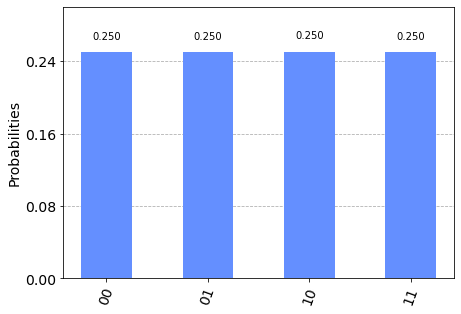

In [43]:
#Parte Simulador
circ = transpile(c, simulator)
device_result = simulator.run(circ, shots=shots, memory=False).result()   
data = device_result.data(0)
plot_histogram(device_result.get_counts())

In [44]:
from qiskit import *
circ = transpile(c, device)
job = execute(circ,backend = device,shots = shots)

NameError: name 'device' is not defined

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)
device_result = job.result()
plot_histogram(device_result.get_counts())

In [48]:
from math import sqrt
#plot_histogram(device_result.get_counts())
counts = device_result.get_counts()
# expectation value
expZ1 = (counts['00']+counts['01']-counts['10']-counts['11'])/shots
expZ2 = (counts['00']+counts['10']-counts['01']-counts['11'])/shots
print(expZ1)
print(expZ2)

-0.0004334
0.000559


In [59]:
from math import pi
def measure_ZZ():
    circ_zz = QuantumCircuit(2,2)
    circ_zz.measure_all(add_bits=False)
    return circ_zz
def measure_YY():
    circ_yy = QuantumCircuit(2,2)
    circ_yy.rx(pi/2,0) #transforma |y+> em |0> e |y-> em |1> para efetuar medida em X
    circ_yy.rx(pi/2,1)
    circ_yy.measure_all(add_bits=False)
    return circ_yy
def measure_XX():
    circ_xx = QuantumCircuit(2,2)
    circ_xx.h(0)
    circ_xx.h(1)
    circ_xx.measure_all(add_bits=False)
    return circ_xx

measures = [measure_ZZ(), measure_XX(), measure_YY()]
for measure in measures:
    circ = c.compose(measure)
    circ = transpile(circ, simulator)
    device_result = simulator.run(circ, shots=shots, memory=False).result()   
    print("-"*10)
    plot_histogram(device_result.get_counts())
    counts = device_result.get_counts()
    # expectation value
    expZ1 = (counts['00']+counts['01']-counts['10']-counts['11'])/shots
    expZ2 = (counts['00']+counts['10']-counts['01']-counts['11'])/shots
    print(expZ1)
    print(expZ2)
    

----------
5.82e-05
0.0002048
----------
0.769755
0.7696218
----------
0.4206186
0.4203778


In [51]:
measures

## Fazer:
### Shots x Precisão do classificador

#### Metodo fabricio 1

In [26]:
from qiskit.aqua.operators import StateFn, Z

psi_N = StateFn(device_result, coeff=1)
ev = (~psi_N@ Z @ psi_N).eval()
ev.real

-0.010000000000000092

In [171]:
psi_N

DictStateFn({'00': 0.5409713485943595, '01': 0.49914927626913375, '10': 0.4803123983409131, '11': 0.47696960070847283}, coeff=1, is_measurement=False)

#### Metodo fabricio 2

In [173]:
result_N = device_result
shots = result_N.results[0].shots
counts = result_N.get_counts()
probs = ([(i, c/shots) for i, c in counts.items()])
P = np.float64(np.array(probs)[:, 1])
ev =  P[0] -P[1]

In [174]:
ev

0.04350000000000001

In [117]:
(counts['00']+counts['01'])/20000

0.5418

In [120]:
((counts['10']+counts['11']))/20000

0.4582

In [ ]:
print(job.job_id())

In [ ]:
data = result.data(0)
#np.asarray(data['density_matrix'])
#rho_AB = qi.DensityMatrix.from_instruction(circ)
#data['density_matrix'].draw('latex', prefix='\\rho_{ibm} = ')
data

In [ ]:
dm = np.array(data['density_matrix']).real
dm

In [ ]:
rho_N = result.data['density_matrix']['density_matrix'][0]['value']
ev = np.trace(rho_N @ qt.sigmaz().full())

In [8]:
import DPQNova as dpq

In [9]:
dpq_c = dpq.DinamicaPontosQuanticos()
#hamiltoniana_p retorna em ordem diferente de seus parametros de entrada.
h= dpq_c.hamiltoniana(j_1=1, j_2=1, bz_1=0, bz_2=0, j_12=1)
h

array([[ 0.75,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.25]])

In [10]:
dm_r= dpq_c.ro(h=h,t=1*10**(-0))
qi.DensityMatrix(dm_r).draw('latex', prefix='\\rho_{classico} = ')

t: 1

type: <class 'int'>


<IPython.core.display.Latex object>

In [90]:
oz1 = dpq_c.Oz1(dm_r)
print("Valor observavel classico oz1:", oz1)
oz2 = dpq_c.Oz2(dm_r)
print("Valor observavel classico oz2:", oz2)
ox1 = dpq_c.Ox1(dm_r)
print("Valor observavel classico ox1:", ox1)
ox2 = dpq_c.Ox2(dm_r)
print("Valor observavel classico ox2:", ox2)
oy1 = dpq_c.Oy1(dm_r)
print("Valor observavel classico oy1:", oy1)
oy2 = dpq_c.Oy2(dm_r)
print("Valor observavel classico oy2:", oy2)


Valor observavel classico oz1: (-1.1102230246251565e-16-1.2886323037180329e-18j)
Valor observavel classico oz2: (-1.1102230246251565e-16-1.2886323037180329e-18j)
Valor observavel classico ox1: (0.7701511529340699+0j)
Valor observavel classico ox2: (0.7701511529340699+4.045117408504467e-18j)
Valor observavel classico oy1: (0.42073549240394825+0j)
Valor observavel classico oy2: (0.42073549240394825+0j)


In [ ]:
dm_r = dm_r.real
dm_r

In [ ]:
psi_AB = qi.Statevector.from_instruction(circ)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(circ)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

In [ ]:
plot_state_city(rho_AB.data, title='Density Matrix')

## 2- Simulação hamiltoniana parte 1.

In [ ]:
circuit1 = QuantumCircuit(2,2)
circuit1.rz(0)#rz? estimar theta com j1?
circuit1.i(1)
circuit1.barrier([0,1])
circuit1.measure(0,1)
circuit1.measure(1,1)
circuit1.barrier([0,1])

circuit1.draw()

## 2.1 - Simulação hamiltoniana parte 2.

In [ ]:
circuit2 = QuantumCircuit(2,2)
circuit2.z(1)#rz? estimar theta com j2?
circuit2.i(0)
circuit2.barrier([0,1])
circuit2.measure(0,1)
circuit2.measure(1,1)
circuit2.barrier([0,1])

circuit2.draw()

## 2.2 - Simulação hamiltoniana parte 3.

In [ ]:
circuit3 = QuantumCircuit(2,2)
circuit3.z(0)#rz? estimar theta com j12?
circuit3.z(1)
circuit3.barrier([0,1])
circuit3.measure(0,1)
circuit3.measure(1,1)
circuit3.barrier([0,1])
circuit3.z(0)#rz? estimar theta com j12?(Valor negativo -theta?)
circuit3.i(1)
circuit3.barrier([0,1])
circuit3.barrier([0,1])
circuit3.measure(0,1)
circuit3.measure(1,1)
circuit3.barrier([0,1])
circuit3.i(0)#rz? estimar theta com j12?(Valor negativo -theta?)
circuit3.z(1)
circuit3.barrier([0,1])
circuit3.measure(0,1)
circuit3.measure(1,1)
circuit3.barrier([0,1])

circuit3.draw()

## 2.3 - Simulação hamiltoniana parte 4.

In [ ]:
circuit4 = QuantumCircuit(2,2)
circuit4.x(0)#rz? estimar theta com j12?
circuit4.i(1)
circuit4.barrier([0,1])
circuit4.measure(0,1)
circuit4.measure(1,1)
circuit4.barrier([0,1])

circuit4.draw()

## 2.4 - Simulação hamiltoniana parte 5.

In [ ]:
circuit5 = QuantumCircuit(2,2)
circuit5.x(1)#rz? estimar theta com j12?
circuit5.i(0)
circuit5.barrier([0,1])
circuit5.measure(0,1)
circuit5.measure(1,1)
circuit5.barrier([0,1])

circuit5.draw()

# circuit.h(0)
#circuit.cx(0, 1)
#circuit.measure([0,1], [0,1])

In [ ]:
circuit.draw()

In [ ]:
help(circuit)

In [ ]:
import qiskit.quantum_info as qi

In [ ]:
rho_0 = qi.DensityMatrix(np.array([[0.25,0.25], [0.25,0.25]]))

In [ ]:
rho_0.draw('latex', prefix='\\rho_0 = ')

In [ ]:
from qiskit.visualization import array_to_latex
Y = qi.Operator.from_label('X')
array_to_latex(Y.data, prefix='X =')

In [ ]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

In [ ]:
from qiskit.visualization import array_to_latex
Y = qi.Operator.from_label('I')
array_to_latex(Y.data, prefix='I =')

In [ ]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

In [ ]:
circ = QuantumCircuit(2,2)
circ.rx(1,0)
circ.rz(0,0)
circ.ry(0,0)
circ.rx(1,1)
circ.rz(0,1)
circ.ry(0,1)

In [ ]:
circ.draw()

In [ ]:
circ.snapshot_density_matrix('density_matrix')

In [ ]:
r = qi.Statevector.from_instruction(circ)
r.draw('latex', prefix='\\rho = ')
